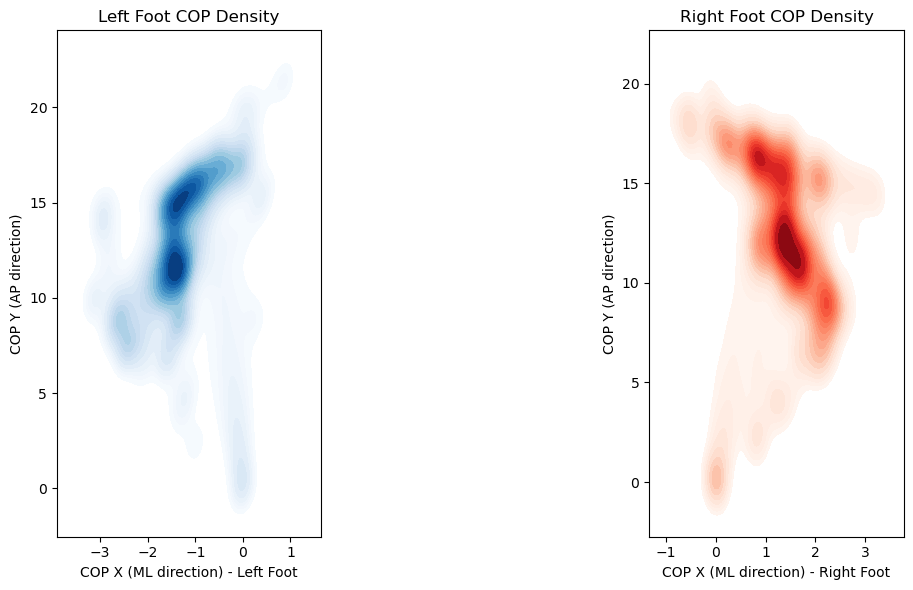

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# === Folder containing all annotated Excel files ===
folder_path = r"E:\PKNU_Data_2025\Aanlysis\Aanlysis_5nos\COP\COP_data"

# === Automatically collect all Excel file paths in the folder ===
file_paths = glob.glob(os.path.join(folder_path, "*.xlsx"))

# Initialize lists to store all participants' COP data
all_L_COP_X, all_L_COP_Y = [], []
all_R_COP_X, all_R_COP_Y = [], []

# Function to extract and normalize gait cycles
def extract_gait_cycles(df, ga_col, cop_x, cop_y):
    gait_phases_x, gait_phases_y = [], []
    indices = df[df[ga_col] == "HES"].index  # Find all heel-strike events

    for i in range(len(indices) - 1):  # Loop through detected steps
        start_idx = indices[i]
        end_idx = df[(df.index > start_idx) & (df[ga_col] == "TOF")].index.min()

        if pd.notna(end_idx) and end_idx > start_idx:
            step_cop_x = df.loc[start_idx:end_idx, cop_x].values
            step_cop_y = df.loc[start_idx:end_idx, cop_y].values

            # Normalize step to 100 points
            gait_phases_x.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(step_cop_x)), step_cop_x))
            gait_phases_y.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(step_cop_y)), step_cop_y))

    return np.concatenate(gait_phases_x), np.concatenate(gait_phases_y)

# Loop through all participant files
for file in file_paths:
    df = pd.read_excel(file, sheet_name=0)
    df.columns = df.columns.str.strip()  # Clean column names

    # Extract gait cycles for left and right foot
    try:
        L_COP_X, L_COP_Y = extract_gait_cycles(df, 'L_GAIT', 'L_COP_X', 'L_COP_Y')
        R_COP_X, R_COP_Y = extract_gait_cycles(df, 'R_GAIT', 'R_COP_X', 'R_COP_Y')

        # Store for final plotting
        all_L_COP_X.extend(L_COP_X)
        all_L_COP_Y.extend(L_COP_Y)
        all_R_COP_X.extend(-R_COP_X)  # Flip right foot horizontally
        all_R_COP_Y.extend(R_COP_Y)
    except Exception as e:
        print(f"⚠️ Error processing file {file}: {e}")

# Convert to NumPy arrays for contour plotting
all_L_COP_X, all_L_COP_Y = np.array(all_L_COP_X), np.array(all_L_COP_Y)
all_R_COP_X, all_R_COP_Y = np.array(all_R_COP_X), np.array(all_R_COP_Y)

# Create contour plots with a more rectangular aspect ratio
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left Foot COP Contour Plot
sns.kdeplot(x=all_L_COP_X, y=all_L_COP_Y, cmap="Blues", fill=True, levels=20, ax=axs[0])
axs[0].set_xlabel('COP X (ML direction) - Left Foot')
axs[0].set_ylabel('COP Y (AP direction)')
axs[0].set_title('Left Foot COP Density')
axs[0].set_aspect(0.4)

# Right Foot COP Contour Plot
sns.kdeplot(x=all_R_COP_X, y=all_R_COP_Y, cmap="Reds", fill=True, levels=20, ax=axs[1])
axs[1].set_xlabel('COP X (ML direction) - Right Foot')
axs[1].set_ylabel('COP Y (AP direction)')
axs[1].set_title('Right Foot COP Density')
axs[1].set_aspect(0.4)

plt.tight_layout()
plt.show()


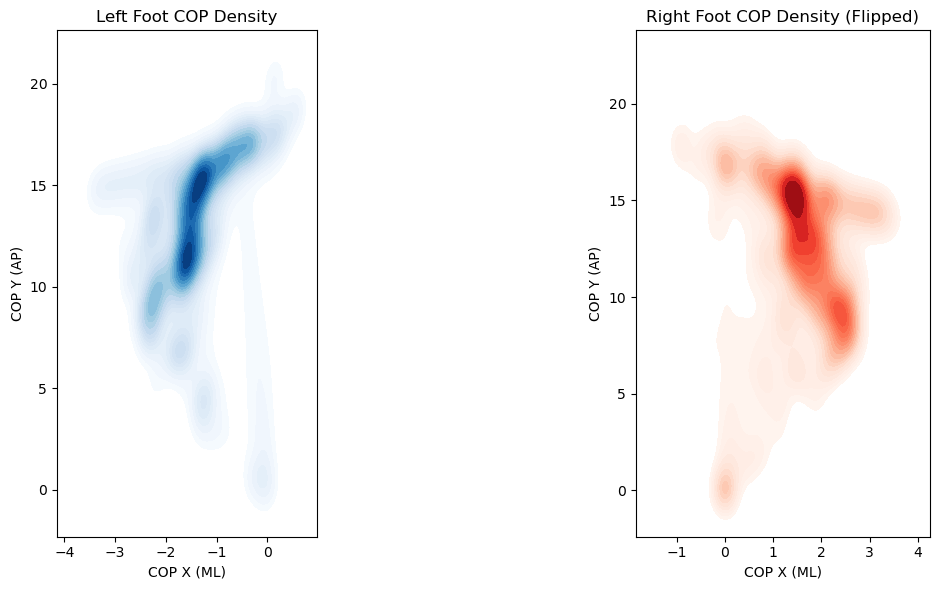

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set the folder path containing CSV files
folder_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Re_annotated_data_1"
file_paths = glob.glob(os.path.join(folder_path, "*.csv"))

# Storage for all COP data
all_L_COP_X, all_L_COP_Y = [], []
all_R_COP_X, all_R_COP_Y = [], []

# Function to extract normalized gait cycles from HES to TOF
def extract_gait_cycles(df, gait_col, cop_x, cop_y):
    gait_x, gait_y = [], []
    indices = df[df[gait_col] == "HES"].index

    for i in range(len(indices)):
        start = indices[i]
        end = df[(df.index > start) & (df[gait_col] == "TOF")].index.min()

        if pd.notna(end) and end > start:
            x = df.loc[start:end, cop_x].values
            y = df.loc[start:end, cop_y].values

            # Normalize step to 100 points
            gait_x.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(x)), x))
            gait_y.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(y)), y))

    return np.concatenate(gait_x), np.concatenate(gait_y)

# Loop through each CSV
for file in file_paths:
    try:
        df = pd.read_csv(file)
        df.columns = df.columns.str.strip()  # Clean column names

        L_COP_X, L_COP_Y = extract_gait_cycles(df, 'L_GAIT', 'L_COP_X', 'L_COP_Y')
        R_COP_X, R_COP_Y = extract_gait_cycles(df, 'R_GAIT', 'R_COP_X', 'R_COP_Y')

        all_L_COP_X.extend(L_COP_X)
        all_L_COP_Y.extend(L_COP_Y)
        all_R_COP_X.extend(-R_COP_X)  # Flip right foot horizontally
        all_R_COP_Y.extend(R_COP_Y)

    except Exception as e:
        print(f"⚠️ Failed to process {os.path.basename(file)}: {e}")

# Convert to NumPy arrays
all_L_COP_X, all_L_COP_Y = np.array(all_L_COP_X), np.array(all_L_COP_Y)
all_R_COP_X, all_R_COP_Y = np.array(all_R_COP_X), np.array(all_R_COP_Y)

# Plot density contours
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(x=all_L_COP_X, y=all_L_COP_Y, cmap="Blues", fill=True, levels=20, ax=axs[0])
axs[0].set_title("Left Foot COP Density")
axs[0].set_xlabel("COP X (ML)")
axs[0].set_ylabel("COP Y (AP)")
axs[0].set_aspect(0.4)

sns.kdeplot(x=all_R_COP_X, y=all_R_COP_Y, cmap="Reds", fill=True, levels=20, ax=axs[1])
axs[1].set_title("Right Foot COP Density (Flipped)")
axs[1].set_xlabel("COP X (ML)")
axs[1].set_ylabel("COP Y (AP)")
axs[1].set_aspect(0.4)

plt.tight_layout()
plt.show()


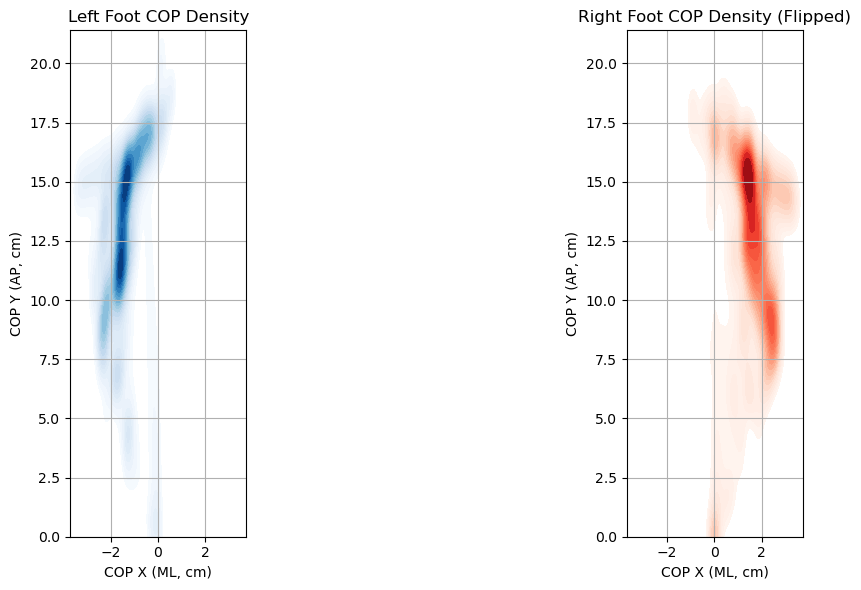

✅ Plot saved to: E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\COP\COP_Density_Plot.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set the folder path containing CSV files
folder_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Re_annotated_data_1"
file_paths = glob.glob(os.path.join(folder_path, "*.csv"))

# Storage for all COP data
all_L_COP_X, all_L_COP_Y = [], []
all_R_COP_X, all_R_COP_Y = [], []

# Function to extract normalized gait cycles from HES to TOF
def extract_gait_cycles(df, gait_col, cop_x, cop_y):
    gait_x, gait_y = [], []
    indices = df[df[gait_col] == "HES"].index

    for i in range(len(indices)):
        start = indices[i]
        end = df[(df.index > start) & (df[gait_col] == "TOF")].index.min()

        if pd.notna(end) and end > start:
            x = df.loc[start:end, cop_x].values
            y = df.loc[start:end, cop_y].values

            # Normalize step to 100 points
            gait_x.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(x)), x))
            gait_y.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(y)), y))

    return np.concatenate(gait_x), np.concatenate(gait_y)

# Loop through each CSV
for file in file_paths:
    try:
        df = pd.read_csv(file)
        df.columns = df.columns.str.strip()  # Clean column names

        L_COP_X, L_COP_Y = extract_gait_cycles(df, 'L_GAIT', 'L_COP_X', 'L_COP_Y')
        R_COP_X, R_COP_Y = extract_gait_cycles(df, 'R_GAIT', 'R_COP_X', 'R_COP_Y')

        all_L_COP_X.extend(L_COP_X)
        all_L_COP_Y.extend(L_COP_Y)
        all_R_COP_X.extend(-R_COP_X)  # Flip right foot horizontally
        all_R_COP_Y.extend(R_COP_Y)

    except Exception as e:
        print(f"⚠️ Failed to process {os.path.basename(file)}: {e}")

# Convert to NumPy arrays
all_L_COP_X = np.array(all_L_COP_X)
all_L_COP_Y = np.array(all_L_COP_Y)
all_R_COP_X = np.array(all_R_COP_X)
all_R_COP_Y = np.array(all_R_COP_Y)

# Plot density contours with equal axis scale
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left Foot COP Plot
sns.kdeplot(x=all_L_COP_X, y=all_L_COP_Y, cmap="Blues", fill=True, levels=20, ax=axs[0])
axs[0].set_title("Left Foot COP Density")
axs[0].set_xlabel("COP X (ML, cm)")
axs[0].set_ylabel("COP Y (AP, cm)")
axs[0].set_aspect("equal")
axs[0].grid(True)

# Right Foot COP Plot (Flipped)
sns.kdeplot(x=all_R_COP_X, y=all_R_COP_Y, cmap="Reds", fill=True, levels=20, ax=axs[1])
axs[1].set_title("Right Foot COP Density (Flipped)")
axs[1].set_xlabel("COP X (ML, cm)")
axs[1].set_ylabel("COP Y (AP, cm)")
axs[1].set_aspect("equal")
axs[1].grid(True)

# Optional: Set consistent axis limits for both plots
x_min = min(np.min(all_L_COP_X), np.min(all_R_COP_X))
x_max = max(np.max(all_L_COP_X), np.max(all_R_COP_X))
y_min = min(np.min(all_L_COP_Y), np.min(all_R_COP_Y))
y_max = max(np.max(all_L_COP_Y), np.max(all_R_COP_Y))

axs[0].set_xlim(x_min, x_max)
axs[1].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max)

plt.tight_layout()

# Save figure as high-resolution PNG
save_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\COP\COP_Density_Plot.png"
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Plot saved to: {save_path}")


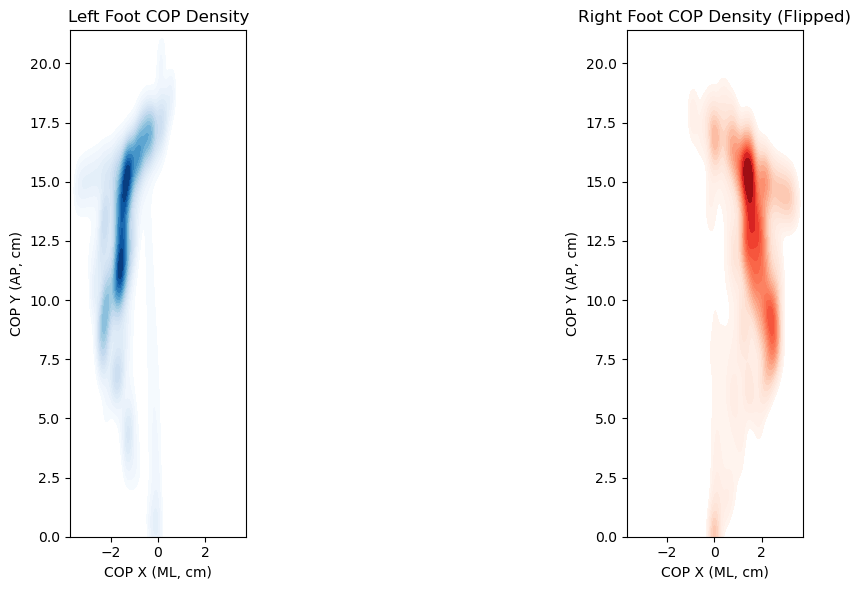

✅ Plot saved to: E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\COP\COP_Density_Plot.png


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set the folder path containing CSV files
folder_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\Data\Re_annotated_data_1"
file_paths = glob.glob(os.path.join(folder_path, "*.csv"))

# Storage for all COP data
all_L_COP_X, all_L_COP_Y = [], []
all_R_COP_X, all_R_COP_Y = [], []

# Function to extract normalized gait cycles from HES to TOF
def extract_gait_cycles(df, gait_col, cop_x, cop_y):
    gait_x, gait_y = [], []
    indices = df[df[gait_col] == "HES"].index

    for i in range(len(indices)):
        start = indices[i]
        end = df[(df.index > start) & (df[gait_col] == "TOF")].index.min()

        if pd.notna(end) and end > start:
            x = df.loc[start:end, cop_x].values
            y = df.loc[start:end, cop_y].values

            # Normalize step to 100 points
            gait_x.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(x)), x))
            gait_y.append(np.interp(np.linspace(0, 1, 100), np.linspace(0, 1, len(y)), y))

    return np.concatenate(gait_x), np.concatenate(gait_y)

# Loop through each CSV
for file in file_paths:
    try:
        df = pd.read_csv(file)
        df.columns = df.columns.str.strip()  # Clean column names

        L_COP_X, L_COP_Y = extract_gait_cycles(df, 'L_GAIT', 'L_COP_X', 'L_COP_Y')
        R_COP_X, R_COP_Y = extract_gait_cycles(df, 'R_GAIT', 'R_COP_X', 'R_COP_Y')

        all_L_COP_X.extend(L_COP_X)
        all_L_COP_Y.extend(L_COP_Y)
        all_R_COP_X.extend(-R_COP_X)  # Flip right foot horizontally
        all_R_COP_Y.extend(R_COP_Y)

    except Exception as e:
        print(f"⚠️ Failed to process {os.path.basename(file)}: {e}")

# Convert to NumPy arrays
all_L_COP_X = np.array(all_L_COP_X)
all_L_COP_Y = np.array(all_L_COP_Y)
all_R_COP_X = np.array(all_R_COP_X)
all_R_COP_Y = np.array(all_R_COP_Y)

# Plot density contours with equal aspect ratio and no grid
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left Foot
sns.kdeplot(x=all_L_COP_X, y=all_L_COP_Y, cmap="Blues", fill=True, levels=20, ax=axs[0])
axs[0].set_title("Left Foot COP Density")
axs[0].set_xlabel("COP X (ML, cm)")
axs[0].set_ylabel("COP Y (AP, cm)")
axs[0].set_aspect("equal")

# Right Foot (Flipped)
sns.kdeplot(x=all_R_COP_X, y=all_R_COP_Y, cmap="Reds", fill=True, levels=20, ax=axs[1])
axs[1].set_title("Right Foot COP Density (Flipped)")
axs[1].set_xlabel("COP X (ML, cm)")
axs[1].set_ylabel("COP Y (AP, cm)")
axs[1].set_aspect("equal")

# Optional: unify axis limits for comparison
x_min = min(np.min(all_L_COP_X), np.min(all_R_COP_X))
x_max = max(np.max(all_L_COP_X), np.max(all_R_COP_X))
y_min = min(np.min(all_L_COP_Y), np.min(all_R_COP_Y))
y_max = max(np.max(all_L_COP_Y), np.max(all_R_COP_Y))

axs[0].set_xlim(x_min, x_max)
axs[1].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)
axs[1].set_ylim(y_min, y_max)

plt.tight_layout()

# Save as high-quality PNG
save_path = r"E:\PKNU_Data_2025\Aanlysis\Anlysis_10nos\COP\COP_Density_Plot.png"
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Plot saved to: {save_path}")
